In [2]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns



In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()
df.shape
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<bound method NDFrame.describe of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
5      281957  tt1663202    9.110700  135000000   532950503   
6       87101  tt1340138    8.654359  155000000   440603537   
7      286217  tt3659388    7.667400  108000000   595380321   
8      211672  tt2293640    7.404165   74000000  1156730962   
9      150540  tt2096673    6.326804  175000000   853708609   
10     206647  tt2379713    6.200282  245000000   880674609   
11      76757  tt1617661    6.189369  176000003   183987723   
12     264660  tt0470752    6.118847   15000000    36869414   
13     257344  tt2120120    5.984995   88000000   243637091   
14      99861  tt2395

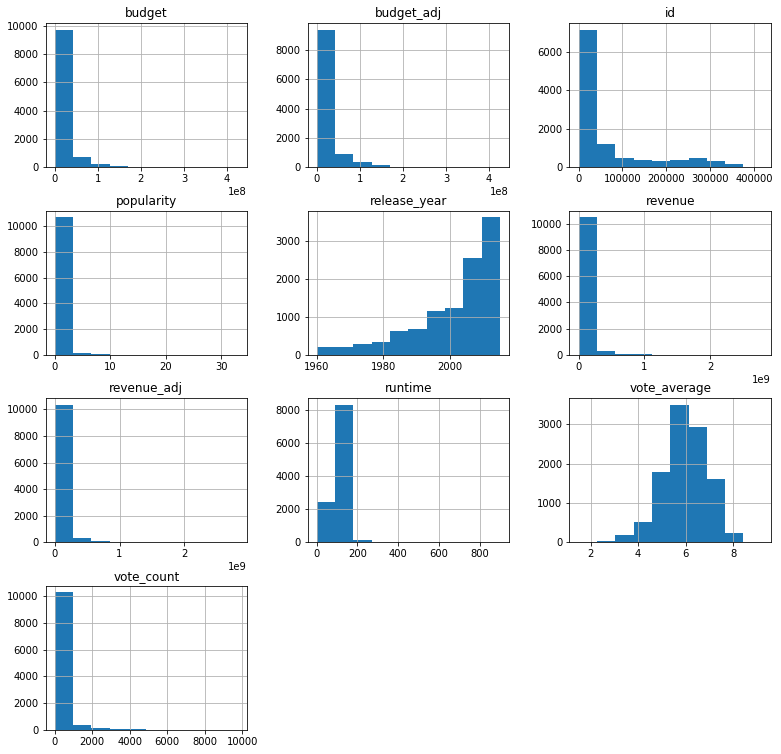

In [9]:
# Preview overall distribution of data from each properties
df.hist(figsize=(13,13));


Data Cleaning process : 
I choose to work with TMDb Movie dataset
This data set contains information about 10000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns




from the first quick check on the data using head and info methods 
i noticed that There are plenty of columns indicating a problem.
Many rows seems to contain several values
They need to be cleaned in the first place in order to provide a proper dataset


I cleaned the database. There were unecessary columns with missing data, inadequate datatypes. The columns 'genres' and 'production_companies' contained multiple values that doesn't meet the requirements of the normal form.


The Cleaning Process

- I dropped the Null value raws
- check the duplicates and Removing the duplicacy in the rows
- Changing release date column into date format.
- change the data type of columns with dtype object like revenue, budget from float to int.
- for the columns "budget_adj", "revenue_adj", "budget", "revenue" and "runtime" i changed its "0" values into "nan" and the respective colums will be dropped for the analysis.
- Checking the all columns are in the desired data type.


In [8]:
#shwoing the datatypes of all the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [16]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#Checking for duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [17]:
df.duplicated().sum()

0

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [26]:
#convering to date time object
df['release_date'] = pd.to_datetime(df['release_date'])

In [27]:
#replacing the "0" with nan-Values
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
id                      1287 non-null int64
imdb_id                 1287 non-null object
popularity              1287 non-null float64
budget                  1287 non-null float64
revenue                 1287 non-null float64
original_title          1287 non-null object
cast                    1287 non-null object
homepage                1287 non-null object
director                1287 non-null object
tagline                 1287 non-null object
keywords                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null float64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              128

In [30]:
#drop data with multiples value from rows 

df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
id                      1287 non-null int64
imdb_id                 1287 non-null object
popularity              1287 non-null float64
budget                  1287 non-null float64
revenue                 1287 non-null float64
original_title          1287 non-null object
cast                    1287 non-null object
homepage                1287 non-null object
director                1287 non-null object
tagline                 1287 non-null object
keywords                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null float64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              128

In [32]:
#changing data type
new_dtype =['budget', 'revenue']
df[new_dtype]=df[new_dtype].applymap(np.int64)
#printing the changed information
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

following Answers some interesting questions about the dataset

Q) what is the most popular movies ? 

In [28]:
genres_popularity = df.groupby(['genres'])['popularity'].mean()
print (genres_popularity)

genres
Action                                                1.655058
Action|Adventure                                      0.805839
Action|Adventure|Animation|Family|Science Fiction     3.339406
Action|Adventure|Animation|Science Fiction            0.480116
Action|Adventure|Comedy                               1.059107
Action|Adventure|Comedy|Drama|Science Fiction         0.631574
Action|Adventure|Comedy|Family                        1.641739
Action|Adventure|Comedy|Science Fiction               2.500619
Action|Adventure|Crime                                6.200282
Action|Adventure|Crime|Drama|Romance                  0.311401
Action|Adventure|Crime|Drama|Thriller                 0.645064
Action|Adventure|Crime|Mystery|Thriller               1.065023
Action|Adventure|Crime|Thriller                       0.935483
Action|Adventure|Drama                                0.393626
Action|Adventure|Drama|Family                         1.125831
Action|Adventure|Drama|Mystery|Romance          

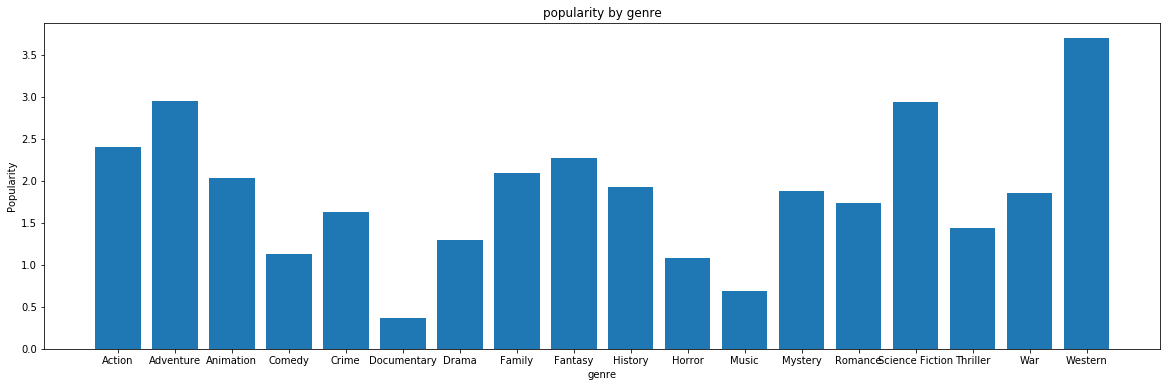

In [34]:
#plot the genres_popularity
plt.subplots(figsize=(20, 6))
plt.bar(genres_popularity.index, genres_popularity)
plt.title('popularity by genre')
plt.xlabel('genre')
plt.ylabel('Popularity');

### Research Question 2  (Replace this header name!)

Q) What kinds of characteristics of movies with high and low revenue?

In [30]:
#Performing statistic on revenue_adj
df['revenue_adj'].describe()

count    1.287000e+03
mean     1.991775e+08
std      2.968515e+08
min      4.300000e+01
25%      2.764890e+07
50%      8.674770e+07
75%      2.351178e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Q) what are the top 10 budget spent by the movies ?

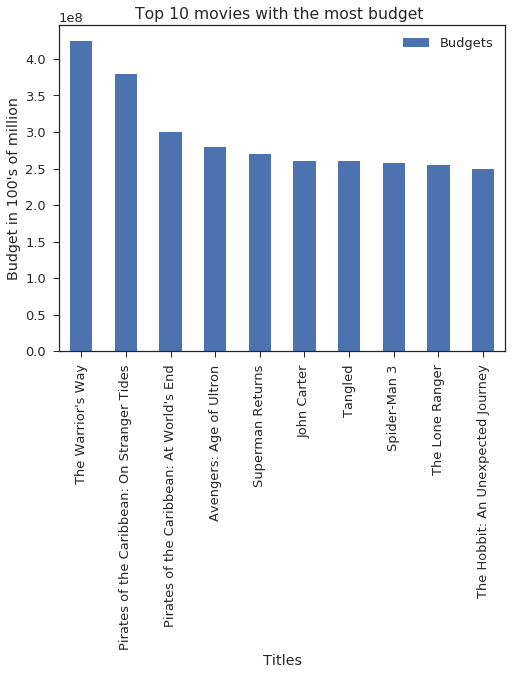

In [20]:
profit_year = df.groupby('release_year')['budget'].sum()
profit_year.head(5)
sorted_budget = df['budget'].sort_values(ascending=False)[:10]
high_budget=pd.DataFrame()
titles_exp=[]
budgets=[]
for i in sorted_budget.index:
    titles_exp.append(df.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
high_budget['Titles']=titles_exp
high_budget['Budgets']=budgets
high_budget.set_index('Titles',inplace=True)
high_budget.plot(kind ='bar',figsize=(8,6))
plt.title('Top 10 movies with the most budget ');
plt.ylabel('Budget in 100\'s of million');

Q)what are the newest movies ? 

In [63]:
newest_movies = df.sort_values(by=['release_year'], ascending = False).head()
newest_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
83,285783,tt3488710,2.049886,35000000,61181942,The Walk,Joseph Gordon-Levitt|Ben Kingsley|Charlotte Le...,http://www.sonypictures.com/movies/thewalk/,Robert Zemeckis,Dream High.,...,The story of French high-wire artist Philippe ...,123.0,Adventure,TriStar Pictures,2015-09-30,706,6.8,2015,3.219999e+07,5.628736e+07
106,273477,tt1727776,1.499614,15000000,14860766,Scouts Guide to the Zombie Apocalypse,Tye Sheridan|Logan Miller|Joey Morgan|Sarah Du...,http://www.scoutsandzombiesmovie.com/,Christopher B. Landon,Always bring protection.,...,Three scouts and lifelong friends join forces ...,93.0,Comedy,Paramount Pictures,2015-10-23,288,6.2,2015,1.379999e+07,1.367190e+07
102,241251,tt3181822,1.651078,4000000,50163103,The Boy Next Door,Jennifer Lopez|Ryan Guzman|Ian Nelson|John Cor...,http://www.theboynextdoorfilm.com/,Rob Cohen,A Moment She Couldn't Resist. An Obsession He ...,...,A recently cheated on married woman falls for ...,91.0,Thriller,Universal Pictures,2015-01-23,810,3.9,2015,3.679998e+06,4.615003e+07
98,283445,tt2752772,1.742286,10000000,52882018,Sinister 2,Shannyn Sossamon|James Ransone|Tate Ellington|...,http://www.sinistermovie.com/,Ciaran Foy,"Be careful, children at play.",...,A young mother and her twin sons move into a r...,97.0,Horror,Alliance Films,2015-08-19,331,5.5,2015,9.199996e+06,4.865144e+07


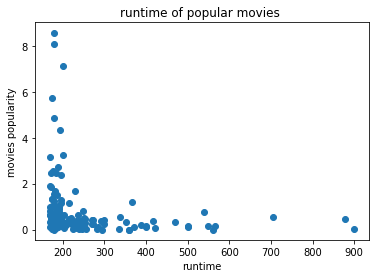

In [23]:
short_movies = df.sort_values(by=['runtime'], ascending = False).head(200)
runtime = short_movies['runtime']
popular_movies = short_movies['popularity']
plt.scatter(runtime, popular_movies)
plt.xlabel('runtime')
plt.ylabel('movies popularity')
plt.title('runtime of popular movies ')
plt.show()

In [ ]:
the scatter plot shows that the more popular movies is the shortest movies.


Q ) Movies with high revenues

In [16]:
#calculate the biggest revenues 
biggest_revenue = df.sort_values(by=['revenue'], ascending = False).head(200)
biggest_revenue.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


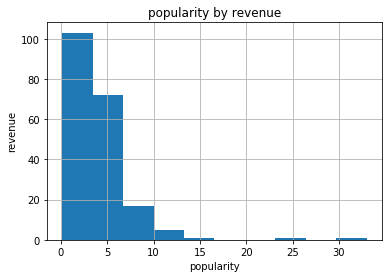

In [24]:
biggest_revenue.popularity.hist()
plt.title('popularity by revenue')
plt.xlabel('popularity')
plt.ylabel('revenue');

Q ) Is there a relation between the runtime of the movie and it's popular? 


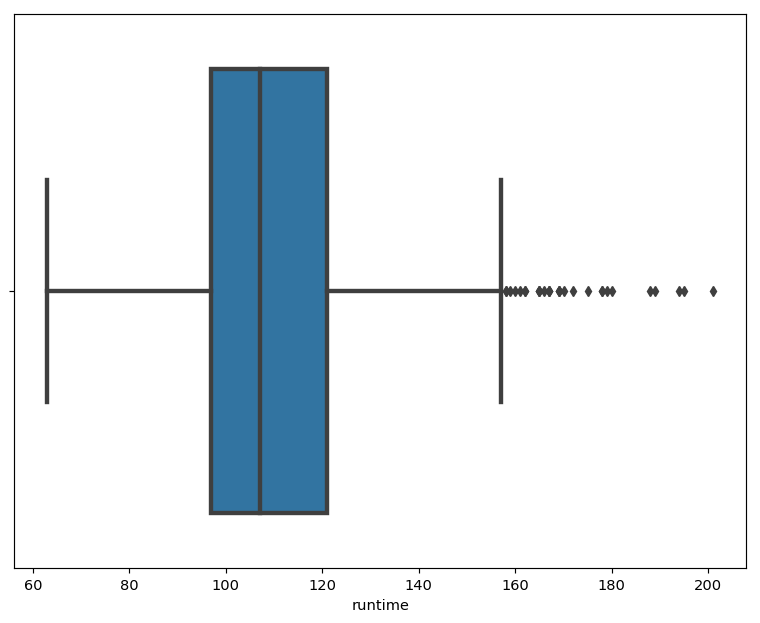

In [43]:
# plot the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)
sns.boxplot(df['runtime'], linewidth = 3)
plt.show()

the boxplot shows that 
25% of movies have a runtime of less than 95 minutes
50% of movies have a runtime of less than 109 minutes.
75% of movies have a runtime of less than 119 minutes

Q) what is the Ratings Distribution by Year ?

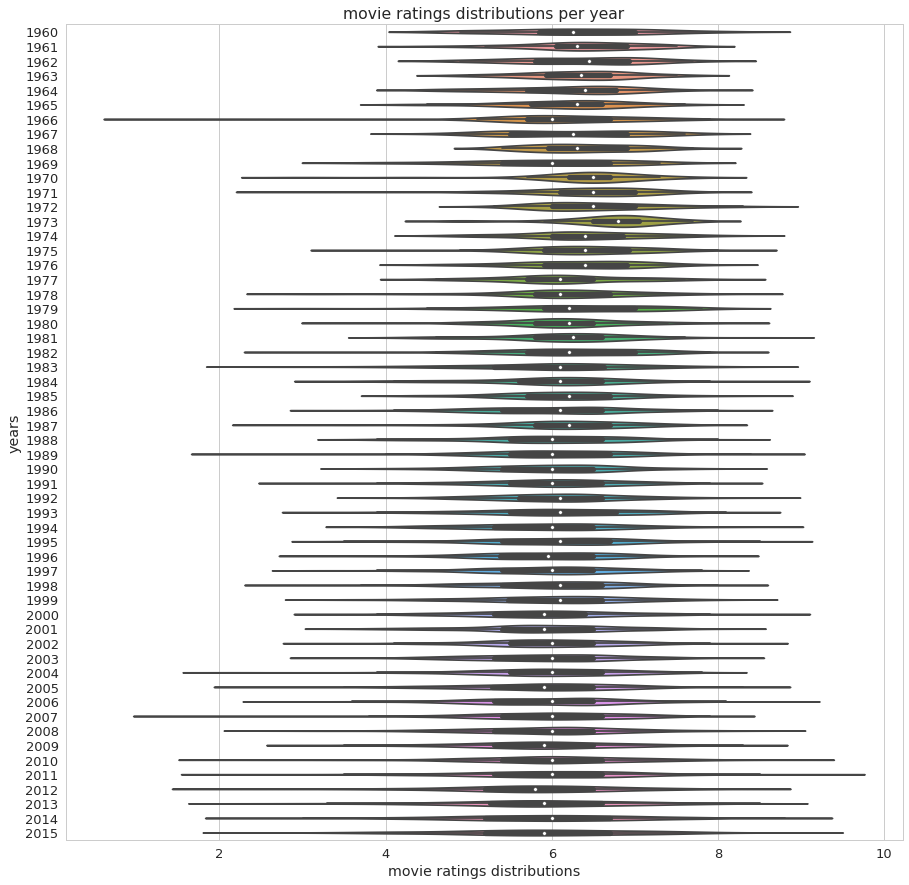

In [24]:
sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3)

temp_df = df[["release_year", "vote_average"]]


sns.set_style("whitegrid")
ax = sns.violinplot(x = temp_df.vote_average, y = temp_df.release_year, orient ="h")

ax.set(xlabel='movie ratings distributions', ylabel='years', title = 'movie ratings distributions per year')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Q) what is the correlations between the adjusted revenue, the adjusted budget, movies' popularity and vote average were produced ?

Text(0.5,0.98,'scatterplot and correlation for popularity and vote_average')

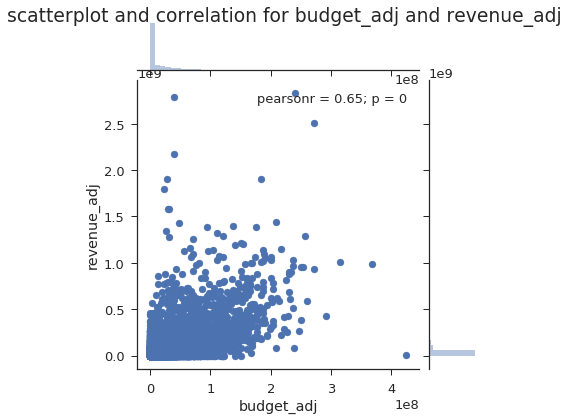

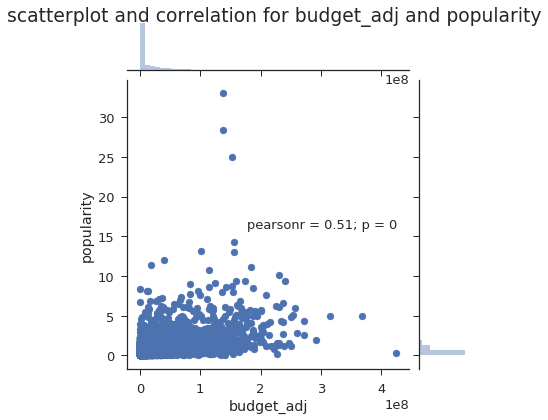

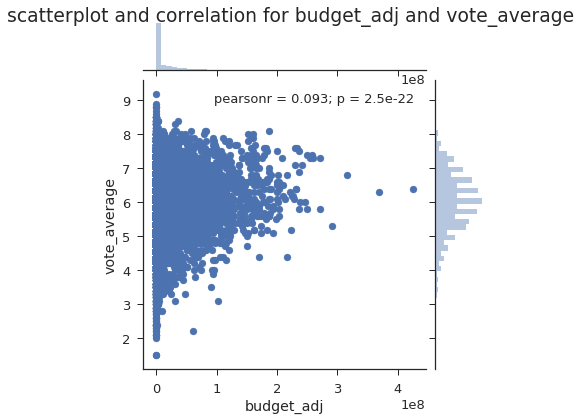

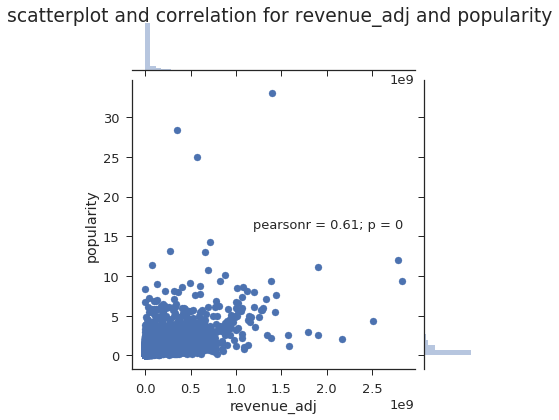

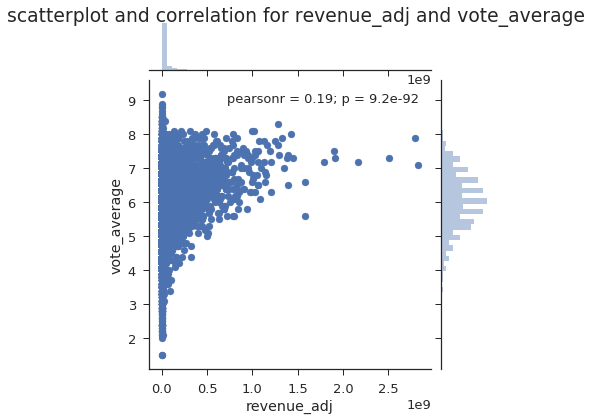

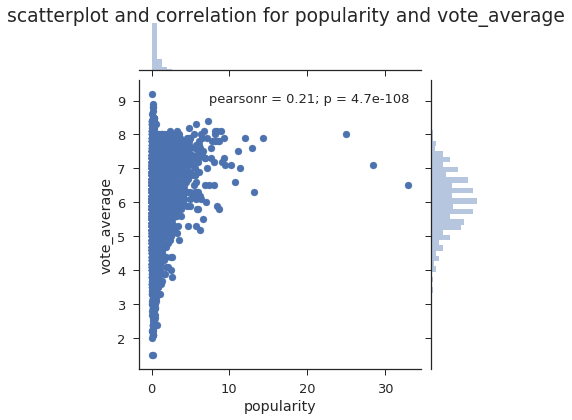

In [16]:
#correlation plots
aux_df = df[['revenue_adj', 'budget_adj', 'popularity', 'vote_average']]

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3, style="ticks")


f1 = sns.jointplot(x = "budget_adj", y = "revenue_adj", kind = "scatter", data = aux_df)
f1.fig.suptitle('scatterplot and correlation for budget_adj and revenue_adj')

f2 = sns.jointplot(x = "budget_adj", y = "popularity", kind = "scatter", data = aux_df)
f2.fig.suptitle('scatterplot and correlation for budget_adj and popularity')
f3 = sns.jointplot(x = "budget_adj", y = "vote_average", kind = "scatter", data = aux_df)
f3.fig.suptitle('scatterplot and correlation for budget_adj and vote_average')

f4 = sns.jointplot(x = "revenue_adj", y = "popularity", kind = "scatter", data = aux_df)
f4.fig.suptitle('scatterplot and correlation for revenue_adj and popularity')
f5 = sns.jointplot(x = "revenue_adj", y = "vote_average", kind = "scatter", data = aux_df)
f5.fig.suptitle('scatterplot and correlation for revenue_adj and vote_average')

f6 = sns.jointplot(x = "popularity", y = "vote_average", kind = "scatter", data = aux_df)
f6.fig.suptitle('scatterplot and correlation for popularity and vote_average')

we can see from the scatter plots that there is a positive correlation between the adjasted revenue, adjasted budget and popularity. Moroever there is a weak positive correlation between the average votes with the other 3 variables (adjasted revenue, adjasted budget and popularity

limitations 
- the dataset given to me was of 10866  rows in total but it contained lot of missing valuesand and movies runtime values,budget,revenue was zero so I had to delete such rows after doing all the cleaning the data left was of 7028 rows that means I drop 3000 rows which may affect the accuray of the results 


after the anlysis process i found that although this dataset is rich in information. nut there are some limitations
the dataset contains null and zero values in some features and many entries in the dataset have been removed due to missing data that affected the accurey of the results
also dropping the rows with missing values also will affected the analysis.
many entries in the dataset have been removed due to missing data that also affected the accurey of the results
Fore example null values is an obstacle which stopped me when I was analyzing the top casted actors. 

- Removing all null values in the columns that have null values
and Replace zero values with null values in the budget and revenue column and Drop the lines with runtime == 0.
those cleaning process increases the time taken in calculating the result but they are important steps toward the anlysis 


- the effect of zero values creates false results during the correlation plots and computing the pearson correlation.
There are many famous actors like Robert De Niro who casted in many films all over these years. There are 20 unique movie genres but drama is the one that show an increasing trend all over these years. Finally there is a positive correlation between some of the features of the TMDb dataset.

- there is no currency unit on columns that provide records about the budget and revenue so that might be possible different movies have budget in different currency according to the country they are produce in so we can not determine what is the highest budget or the lowest ones and that will reflect in all the anlysis that calculate the relations between the budget or revenue and other columns. 



Conclusions : 
this data analysis process came out with very interesting facts about movies , conclude following:

- Average Budget must be around 60 millon dollar
- Average duration of the movie must be 113 minutes
- the more popular movies is the shortest movies
- the most revenuable movies has popularity around 2.5
- there is a positive correlation between the adjasted revenue, adjasted budget and popularity. Moroever there is a weak positive correlation between the average votes with the other 3 variables (adjasted revenue, adjasted budget and popularity
- all the years have mean ratings about 6 to 6.5. However some exclusions such as the year 1974 has mean ratings around 7. It seems that during this time a good movie with high impact was presented 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])